In [1]:
import cnidcal as cdc
import numpy as np
from numpy import dot, cross, pi, square
from numpy.linalg import det, norm, inv
from celldraw import cellsdrawer

# Inpute two primitive lattices, a rotation matrix

In [2]:
lattice_1 = np.array([[-2.734364, -2.734364,  0],
                      [-2.734364,  0, -2.734364],
                      [ 0, -2.734364, -2.734364]])
lattice_2 = np.array([[-1.48839924e+00, -1.48839924e+00, -5.44941797e-16],
                      [-2.57798310e+00,  2.57798310e+00,  8.58061028e-17],
                      [-3.08915674e-16,  4.34918912e-16, -2.53091000e+01]])
R = np.array([[-0.40824829, -0.70710678, -0.57735027],
              [-0.40824829,  0.70710678, -0.57735027],
              [ 0.81649658,  0.        , -0.57735027]])

# Get the miller indices of the interface plane expressed in the primitive lattice (you can obtain this by transfoming the conventional miller indices)

In [3]:
conv_lattice_1 = 2.734364 * 2 * np.eye(3)
miller_ind_pri = cdc.get_primitive_hkl(hkl = [1,1,1], C_lattice = conv_lattice_1, P_lattice = lattice_1)
miller_ind_pri

array([-1, -1, -1])

# Get the two plane bases

In [5]:
PB_1, PB_2 = cdc.get_two_bases(lattice_1, lattice_2, R, miller_ind_pri)
PB_1, PB_2

(array([[-2.734364, -2.734364],
        [ 2.734364,  0.      ],
        [ 0.      ,  2.734364]]),
 array([[ 2.43054577,  1.21527288],
        [-1.21527288, -2.43054577],
        [-1.21527289,  1.21527289]]))

# Compute the two-D CSL & CNID, and you can express them in the primitive lattice or conventional lattice frame

In [10]:
CSL = cdc.search_CSL(PB_1, PB_2, 20)
CNID = cdc.searchcnid(PB_1, PB_2, 20)

In [11]:
#CSL expressed in the primitive and conventional cell
CSL_in_P = np.round(cdc.get_coef_exp_ltc(lattice_1, CSL),5)
CSL_in_C = np.round(cdc.get_coef_exp_ltc(conv_lattice_1, CSL),5)
CSL_in_P, CSL_in_C

(array([[-0., -4.],
        [-4.,  0.],
        [ 4.,  4.]]),
 array([[ 2.,  2.],
        [-2.,  0.],
        [ 0., -2.]]))

In [12]:
#CNID expressed in primitive lattice 1
CNID_in_P = cdc.get_coef_exp_ltc(lattice_1, CNID)
cdc.get_fraction_basis(CNID_in_P)

array([['-1/9', '1/9'],
       ['2/9', '1/9'],
       ['-1/9', '-2/9']], dtype='<U21')

In [13]:
#CNID expressed in conventional lattice 1
CNID_in_C = cdc.get_coef_exp_ltc(conv_lattice_1, CNID)
cdc.get_fraction_basis(CNID_in_C)

array([['-1/18', '-2/18'],
       ['2/18', '1/18'],
       ['-1/18', '1/18']], dtype='<U21')

In [14]:
#CNID expressed in lattice 2
CNID_in_P = cdc.get_coef_exp_ltc(dot(R,lattice_2), CNID)
cdc.get_fraction_basis(CNID_in_P)

array([['0/4', '-1/4'],
       ['1/4', '0/4'],
       ['0/4', '0/4']], dtype='<U21')

# Visualize the cells

A drawer class containing information of all cells

In [15]:
my_cells = cellsdrawer(PB_1, PB_2, CSL, CNID, 20)

The CSL lattice of the two plane basis

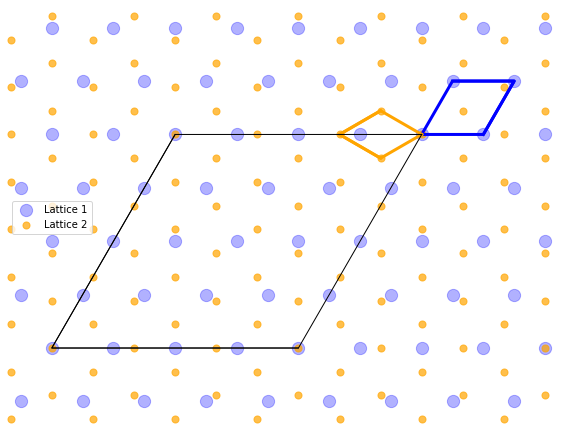

In [22]:
#Show the two lattices and their CSL
my_cells.draw_direct(xlow = -26, xhigh = 9, ylow = -18.4, 
                     yhigh = 8, figsize_x = 10, figsize_y = 10, show_legend = True)

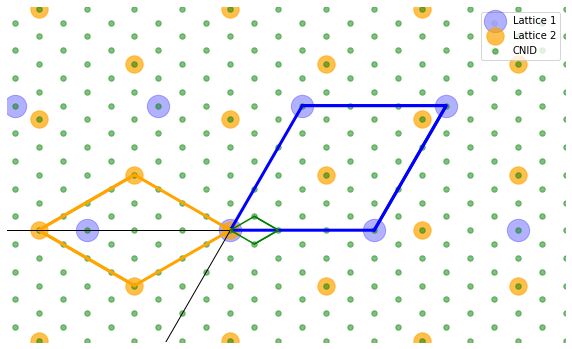

In [23]:
#Show the zoomed figure and DSC
my_cells.draw_direct(xlow = -6, xhigh = 9, ylow = -3, yhigh = 6, \
                     figsize_x = 10, figsize_y = 10, size_LP_1 = 500, \
                     size_LP_2 = 300, show_CNID_points = True, show_CNID_cell = True, show_legend = True)

The CSL lattice of the two reciprocal lattices

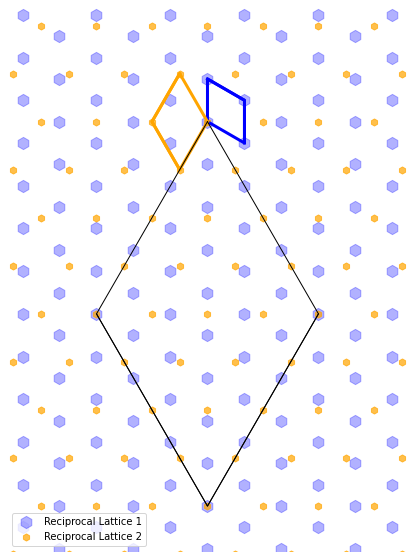

In [24]:
#Show the two reciprocal lattices and their CSL
my_cells.draw_reciprocal(xlow = -1.4, xhigh = 1.4, ylow = -3, 
                         yhigh = 0.8, figsize_x = 10, figsize_y = 10, show_legend = True)